In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft
import mogptk

In [2]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

In [3]:
x=np.linspace(0,1,1600)

In [4]:
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]

Text(0, 0.5, 'Y')

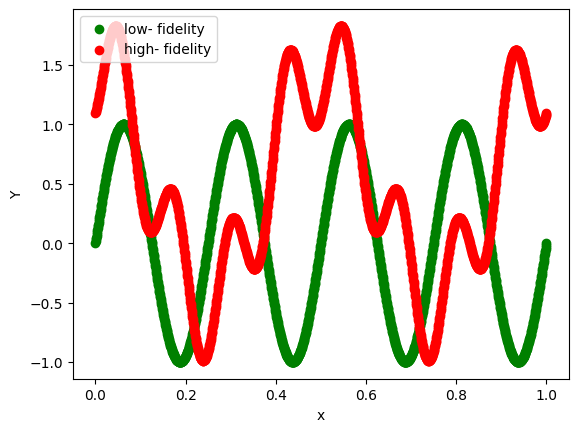

In [5]:
plt.scatter(x, points1, c="g", label="low- fidelity")
plt.scatter(x, points2, c="r", label="high- fidelity")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("Y")
#plt.show()


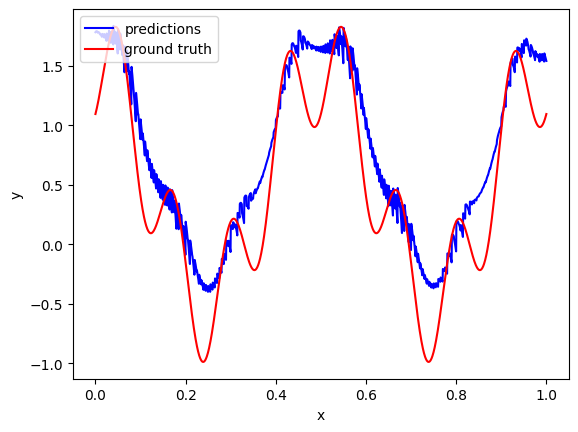

In [6]:
# nargp with sm kernel components and frequency inputs
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train+[0,0])



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm")
m2_real = mogptk.LoadModel('m2_r_sin_sm')
m3_real = mogptk.LoadModel('m3_r_sin_sm')
m4_real = mogptk.LoadModel('m4_r_sin_sm')
m5_real = mogptk.LoadModel('m5_r_sin_sm')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm")
m2_im = mogptk.LoadModel('m2_i_sin_sm')
m3_im = mogptk.LoadModel('m3_i_sin_sm')
m4_im = mogptk.LoadModel('m4_i_sin_sm')
m5_im = mogptk.LoadModel('m5_i_sin_sm')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_nargp_freq.jpeg")

In [7]:

from calc_rmse import calc_rmse
calc_rmse(values_kernel, np.asarray(points2))

0.3876434932019276

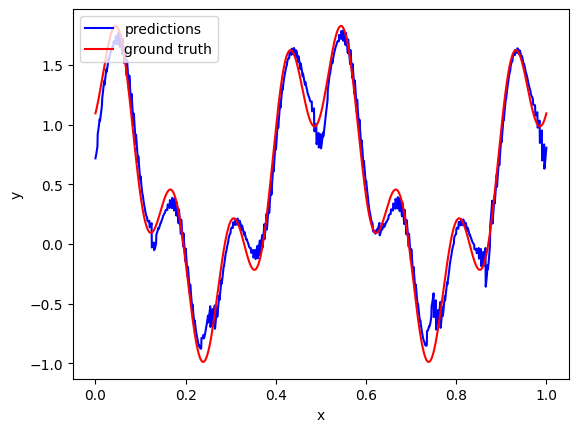

In [8]:
# nargp with custom kernel and frequency inputs
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train+[0,0])



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp")
m2_real = mogptk.LoadModel('m2_r_sin_nargp')
m3_real = mogptk.LoadModel('m3_r_sin_nargp')
m4_real = mogptk.LoadModel('m4_r_sin_nargp')
m5_real = mogptk.LoadModel('m5_r_sin_nargp')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp")
m2_im = mogptk.LoadModel('m2_i_sin_nargp')
m3_im = mogptk.LoadModel('m3_i_sin_nargp')
m4_im = mogptk.LoadModel('m4_i_sin_nargp')
m5_im = mogptk.LoadModel('m5_i_sin_nargp')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_nargp_freq.jpeg")

In [9]:
from calc_rmse import calc_rmse
calc_rmse(values_kernel, np.asarray(points2))

0.128842886517097

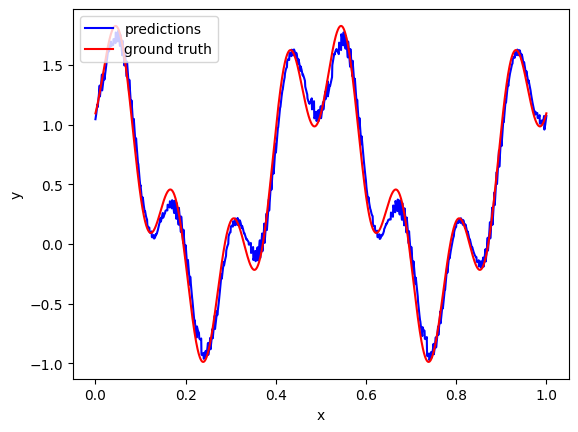

In [10]:
# tests with nargp + spectral mixture kernels and without frequencies
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []

probe_x=[]
probe_x2=[]
for i in range(200):
    value1 = (f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k)
     #   real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

    probe_x.append(points[i][0])
    probe_x2.append(points[i][1])
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_no_freq")
m2_real = mogptk.LoadModel('m2_r_sin_sm_no_freq')
m3_real = mogptk.LoadModel("m3_r_sin_sm_no_freq")
m4_real = mogptk.LoadModel('m4_r_sin_sm_no_freq')
m5_real = mogptk.LoadModel('m5_r_sin_sm_no_freq')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_no_freq")
m2_im = mogptk.LoadModel('m2_i_sin_sm_no_freq')
m3_im = mogptk.LoadModel('m3_i_sin_sm_no_freq')
m4_im = mogptk.LoadModel('m4_i_sin_sm_no_freq')
m5_im = mogptk.LoadModel('m5_i_sin_sm_no_freq')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []

probe_points=[]
probe_points2r=[]
probe_points2i=[]
probe_points5r=[]
probe_points5i=[]
for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
        probe_points.append(r)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
        probe_points2r.append(r)
        probe_points2i.append(im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)
        probe_points5r.append(r)
        probe_points5i.append(im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_nargp_nofreq.jpeg")

In [11]:
calc_rmse(values_kernel, points2)

0.09706591723119036

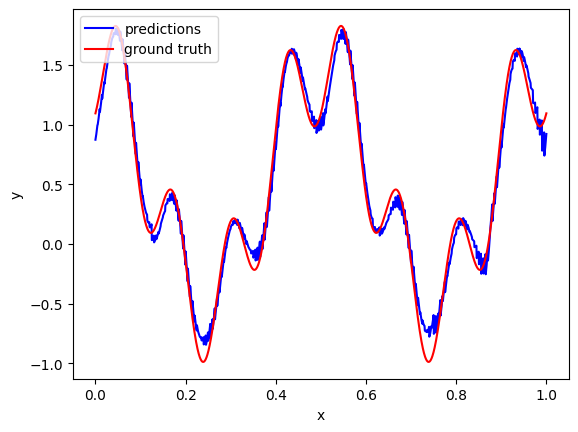

In [12]:
# tests with nargp+ custom kernel and without frequencies
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = (f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k)
     #   real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp_no_freq")
m2_real = mogptk.LoadModel('m2_r_sin_nargp_no_freq')
m3_real = mogptk.LoadModel("m3_r_sin_nargp_no_freq")
m4_real = mogptk.LoadModel('m4_r_sin_nargp_no_freq')
m5_real = mogptk.LoadModel('m5_r_sin_nargp_no_freq')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp_no_freq")
m2_im = mogptk.LoadModel('m2_i_sin_nargp_no_freq')
m3_im = mogptk.LoadModel('m3_i_sin_nargp_no_freq')
m4_im = mogptk.LoadModel('m4_i_sin_nargp_no_freq')
m5_im = mogptk.LoadModel('m5_i_sin_nargp_no_freq')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_nargp_nofreq.jpeg")

In [13]:
calc_rmse(values_kernel, points2)

0.10665478227006292

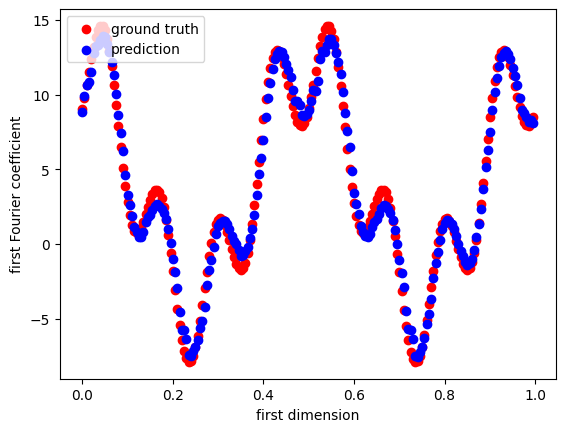

In [34]:
#plot optimised function, first frequency
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[0].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[0].imag)

plt.scatter(first_point, (first_freq_real),c="r", label="ground truth")
plt.scatter(first_point, probe_points, c="b", label="prediction")
plt.xlabel("first dimension")
plt.ylabel("first Fourier coefficient")
plt.legend(loc="upper left")
plt.savefig("first_freq_custom.jpeg")

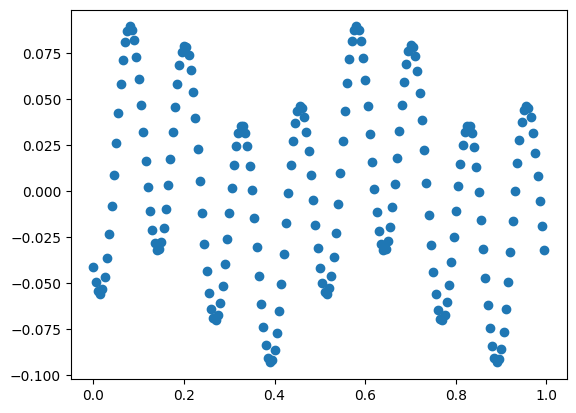

In [45]:
# optimised function second frequency
#plot optimised function, first frequency
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[3].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[3].imag)

plt.scatter(first_point, (first_freq_real))

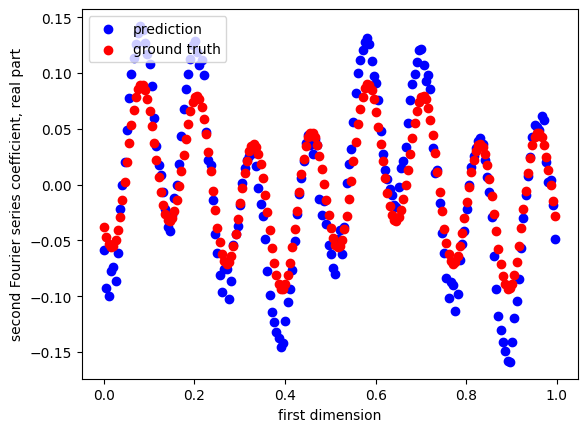

In [37]:
plt.scatter(probe_x2, probe_points2r, c="b", label="prediction")
plt.scatter(probe_x2, first_freq_real, c="r", label="ground truth")
plt.xlabel("first dimension")
plt.ylabel("second Fourier series coefficient, real part")
plt.legend(loc="upper left")
plt.savefig("second_freq_custom_real.jpeg")

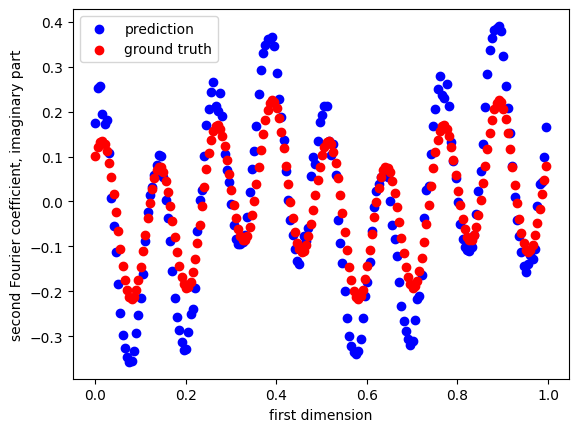

In [38]:
plt.scatter(probe_x2, probe_points2i,c="b", label="prediction")
plt.scatter(probe_x2,first_freq_imag, c="r", label="ground truth")
plt.xlabel("first dimension")
plt.ylabel("second Fourier coefficient, imaginary part")
plt.legend(loc="upper left")
plt.savefig("second_freq_custom_imag.jpeg")

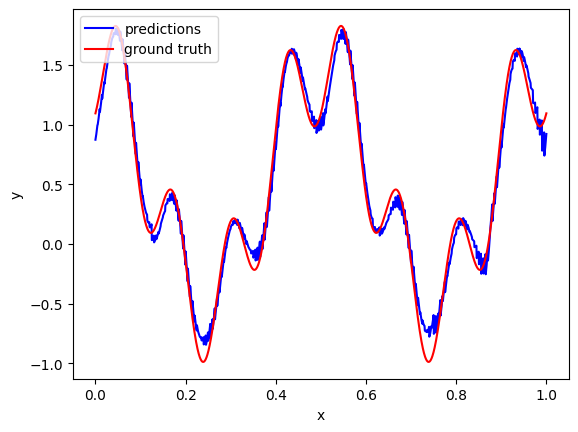

In [50]:
# tests with nargp and custom kernel and without frequencies
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = (f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k)
     #   real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp_no_freq")
m2_real = mogptk.LoadModel('m2_r_sin_nargp_no_freq')
m3_real = mogptk.LoadModel("m3_r_sin_nargp_no_freq")
m4_real = mogptk.LoadModel('m4_r_sin_nargp_no_freq')
m5_real = mogptk.LoadModel('m5_r_sin_nargp_no_freq')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp_no_freq")
m2_im = mogptk.LoadModel('m2_i_sin_nargp_no_freq')
m3_im = mogptk.LoadModel('m3_i_sin_nargp_no_freq')
m4_im = mogptk.LoadModel('m4_i_sin_nargp_no_freq')
m5_im = mogptk.LoadModel('m5_i_sin_nargp_no_freq')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_nargp_nofreq.jpeg")